In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,\
davies_bouldin_score as dbs, normalized_mutual_info_score as nmi, adjusted_rand_score as ars
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss
from sklearn import model_selection, metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from sklearn.cluster import KMeans
from typing import Tuple
import pandas as pd
import itertools
import numpy as np
import argparse
import random
import umap
import sys
import umap
from CAC import CAC

In [17]:
DATASET = ["magic", "diabetes"]
classifier = ['LR', 'Perceptron']
color = color = ['grey', 'red', 'blue', 'pink', 'brown', 'black', 'magenta', 'purple', 'orange', 'cyan', 'olive']

In [75]:
def get_dataset(DATASET):
	if DATASET == "cic":
	    Xa = pd.read_csv("./data/CIC/cic_set_a.csv")
	    Xb = pd.read_csv("./data/CIC/cic_set_b.csv")
	    Xc = pd.read_csv("./data/CIC/cic_set_c.csv")

	    ya = Xa['In-hospital_death']
	    yb = Xb['In-hospital_death']
	    yc = Xc['In-hospital_death']

	    Xa = Xa.drop(columns=['recordid', 'Survival', 'In-hospital_death'])
	    Xb = Xb.drop(columns=['recordid', 'Survival', 'In-hospital_death'])
	    Xc = Xc.drop(columns=['recordid', 'Survival', 'In-hospital_death'])

	    cols = Xa.columns

	    scale = StandardScaler()
	    Xa = scale.fit_transform(Xa)
	    Xb = scale.fit_transform(Xb)
	    Xc = scale.fit_transform(Xc)

	    Xa = pd.DataFrame(Xa, columns=cols)
	    Xb = pd.DataFrame(Xb, columns=cols)
	    Xc = pd.DataFrame(Xc, columns=cols)

	    Xa = Xa.fillna(0)
	    Xb = Xb.fillna(0)
	    Xc = Xc.fillna(0)

	    X_train = pd.concat([Xa, Xb])
	    y_train = pd.concat([ya, yb])

	    X_test = Xc
	    y_test = yc

	    X = pd.concat([X_train, X_test]).to_numpy()
	    y = pd.concat([y_train, y_test]).to_numpy()

	elif DATASET == "titanic":
	    X_train = pd.read_csv("./data/" + DATASET + "/" + "X_train.csv").to_numpy()
	    X_test = pd.read_csv("./data/" + DATASET + "/" + "X_test.csv").to_numpy()
	    y_train = pd.read_csv("./data/" + DATASET + "/" + "y_train.csv").to_numpy()
	    y_test = pd.read_csv("./data/" + DATASET + "/" + "y_test.csv").to_numpy()

	    X = np.vstack([X_train, X_test])
	    y = np.vstack([y_train, y_test])
	    # X = pd.concat([X_train, X_test]).to_numpy()
	    # y = pd.concat([y_train, y_test]).to_numpy()

	else:
	    X = pd.read_csv("./data/" + DATASET + "/" + "X.csv").to_numpy()
	    y = pd.read_csv("./data/" + DATASET + "/" + "y.csv").to_numpy()

	y1 = []
	for i in range(len(y)):
		y1.append(y[i][0])
	y = np.array(y1)
	return X, y

In [11]:
X, y = get_dataset(DATASET[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=108) 
scale = StandardScaler()
X_train = scale.fit_transform(X_train) 
X_test = scale.fit_transform(X_test)
reducer = umap.UMAP()

In [12]:
X1 = reducer.fit_transform(X_train)

/Users/shivin/Library/Python/3.7/lib/python/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [21]:
dbts = CAC(2, 2.5, classifier="Perceptron")
dbts.fit(X_train, y_train)

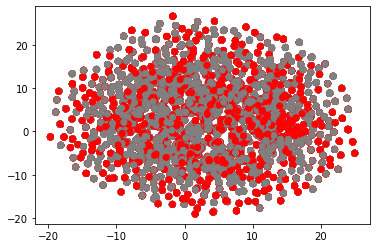

In [25]:
# True Distribution
c = [color[int(y_train[i])] for i in range(len(y_train))]
plt.scatter(X1[:,0], X1[:,1], color=c); plt.show()

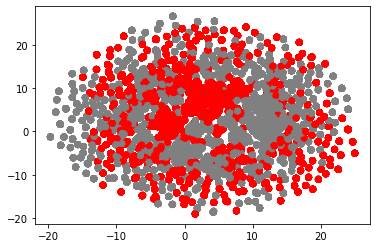

In [23]:
c = [color[int(dbts.labels[0][i])] for i in range(len(y_train))]
plt.scatter(X1[:,0], X1[:,1], color=c); plt.show()

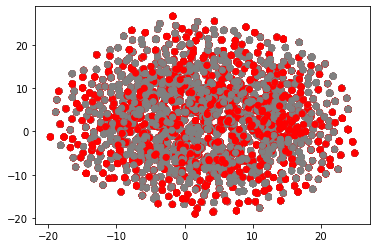

In [24]:
c = [color[int(dbts.labels[-1][i])] for i in range(len(y_train))]
plt.scatter(X1[:,0], X1[:,1], color=c); plt.show()

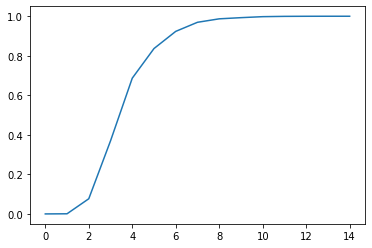

In [32]:
# Overfitting? Rand index of 
vals = []
for i in range(len(dbts.labels)):
    vals.append(ars(y_train, dbts.labels[i]))
plt.plot(vals)
plt.show()

In [65]:
X, y = get_dataset(DATASET[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=108) 
scale = StandardScaler()
X_train = scale.fit_transform(X_train) 
X_test = scale.fit_transform(X_test)

In [35]:
X2 = reducer.fit_transform(X_train)

In [71]:
magic = CAC(2, 0.05, classifier="Perceptron")
magic.fit(X_train, y_train)

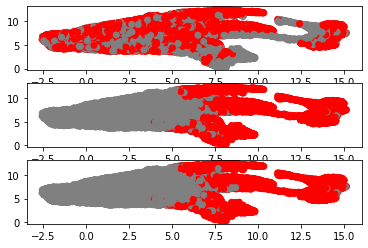

In [72]:
gs = gridspec.GridSpec(3,1)

pl.figure()
ax = pl.subplot(gs[0])
c = [color[int(y_train[i])] for i in range(len(y_train))]
pl.scatter(X2[:,0], X2[:,1], color=c)
# pl.plot([0,1])

ax = pl.subplot(gs[1])
c = [color[int(magic.labels[0][i])] for i in range(len(y_train))]
pl.scatter(X2[:,0], X2[:,1], color=c)

ax = pl.subplot(gs[2])
c = [color[int(magic.labels[-1][i])] for i in range(len(y_train))]
plt.scatter(X2[:,0], X2[:,1], color=c); plt.show()

In [73]:
y_pred = magic.predict(X_test, -1)
f1_score(y_pred[0], y_test)

0.789178805826797

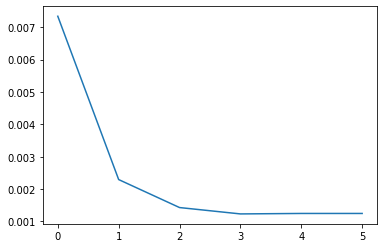

In [74]:
# Overfitting?
vals = []
for i in range(len(magic.labels)):
    vals.append(ars(y_train, magic.labels[i]))
plt.plot(vals)
plt.show()

In [41]:
magic = CAC(2, 2, classifier="Perceptron")
magic.fit(X_train, y_train)